In [1]:
# Gravitational Lensing Research
# Program to plot kappa vs. radius, with +/- 1-sigma bands, generated in 'Kappa band calculator' notebook.
# Version 4: assumes the band radii are in kpc, not arc seconds.
# Can also plot mass enclosed if desired.

In [2]:
import time
import matplotlib.pyplot as plt
import matplotlib
import sys
import numpy as np
import os
import timeit
from IPython.core.debugger import set_trace
import datetime

In [3]:
# The current working directory should be the "chains_..." subdirectory for the run of interest.
print(os.getcwd())

/Users/kevin/CloudStation/KEVIN/UCI/Research/gravlensing/Python


In [4]:
title_name = 'MS2137' # This is plot title
# Enter a list for each of names, suffixes, legend_names.
names = ['MS2137', 'MS2137']  #, 'RXCJ2248']
suffixes = ['.cnfw.V13', '.cc.v13']
dir_names = names
legend_names = ['cNFW', 'Corecusp']  
enable_left_y_axis = False  # If you want to plot enclosed mass on the left axis.

labels = [nm + suf for (nm, suf) in zip(names, suffixes)]
# basepath = '/home/kea/KEVIN/UCI/Research/gravlensing/' 
basepath = '/Users/kevin/CloudStation/KEVIN/UCI/Research/gravlensing/'

line_types = ['dmo', 'bary']  #, 'mencl']  #, '.all'] 
# valid types are ['all', 'dmo', 'bary', 'mencl']
matter_phrases =  ['dark matter', 'baryons']  #, 'mass enclosed']  # 'all matter'
long_fns = [basepath + nm + '/chains_' + lab + '/' + lab + '.' + m_type + '.bands4.npz'\
             for nm, lab in zip(dir_names, labels) for m_type in line_types]
long_legends = [ln + ', ' + phr for ln in legend_names for phr in matter_phrases]


rad_list = []
lower_line = []
upper_line = []
median_line = []
label_list = []
for fn, lab in zip(long_fns, long_legends):
    if os.path.isfile(fn):
        print('Found ', fn)
        f_arrays = np.load(fn)
        rad_list.append(f_arrays['arr_0'])
        lower_line.append(f_arrays['arr_1'])
        upper_line.append(f_arrays['arr_2'])
        median_line.append(f_arrays['arr_3'])
        label_list.append(lab)
    else:
        print('File NOT found: ', fn)
        sys.exit()

Found  /Users/kevin/CloudStation/KEVIN/UCI/Research/gravlensing/MS2137/chains_MS2137.cnfw.V13/MS2137.cnfw.V13.dmo.bands4.npz
Found  /Users/kevin/CloudStation/KEVIN/UCI/Research/gravlensing/MS2137/chains_MS2137.cnfw.V13/MS2137.cnfw.V13.bary.bands4.npz
Found  /Users/kevin/CloudStation/KEVIN/UCI/Research/gravlensing/MS2137/chains_MS2137.cc.v13/MS2137.cc.v13.dmo.bands4.npz
Found  /Users/kevin/CloudStation/KEVIN/UCI/Research/gravlensing/MS2137/chains_MS2137.cc.v13/MS2137.cc.v13.bary.bands4.npz


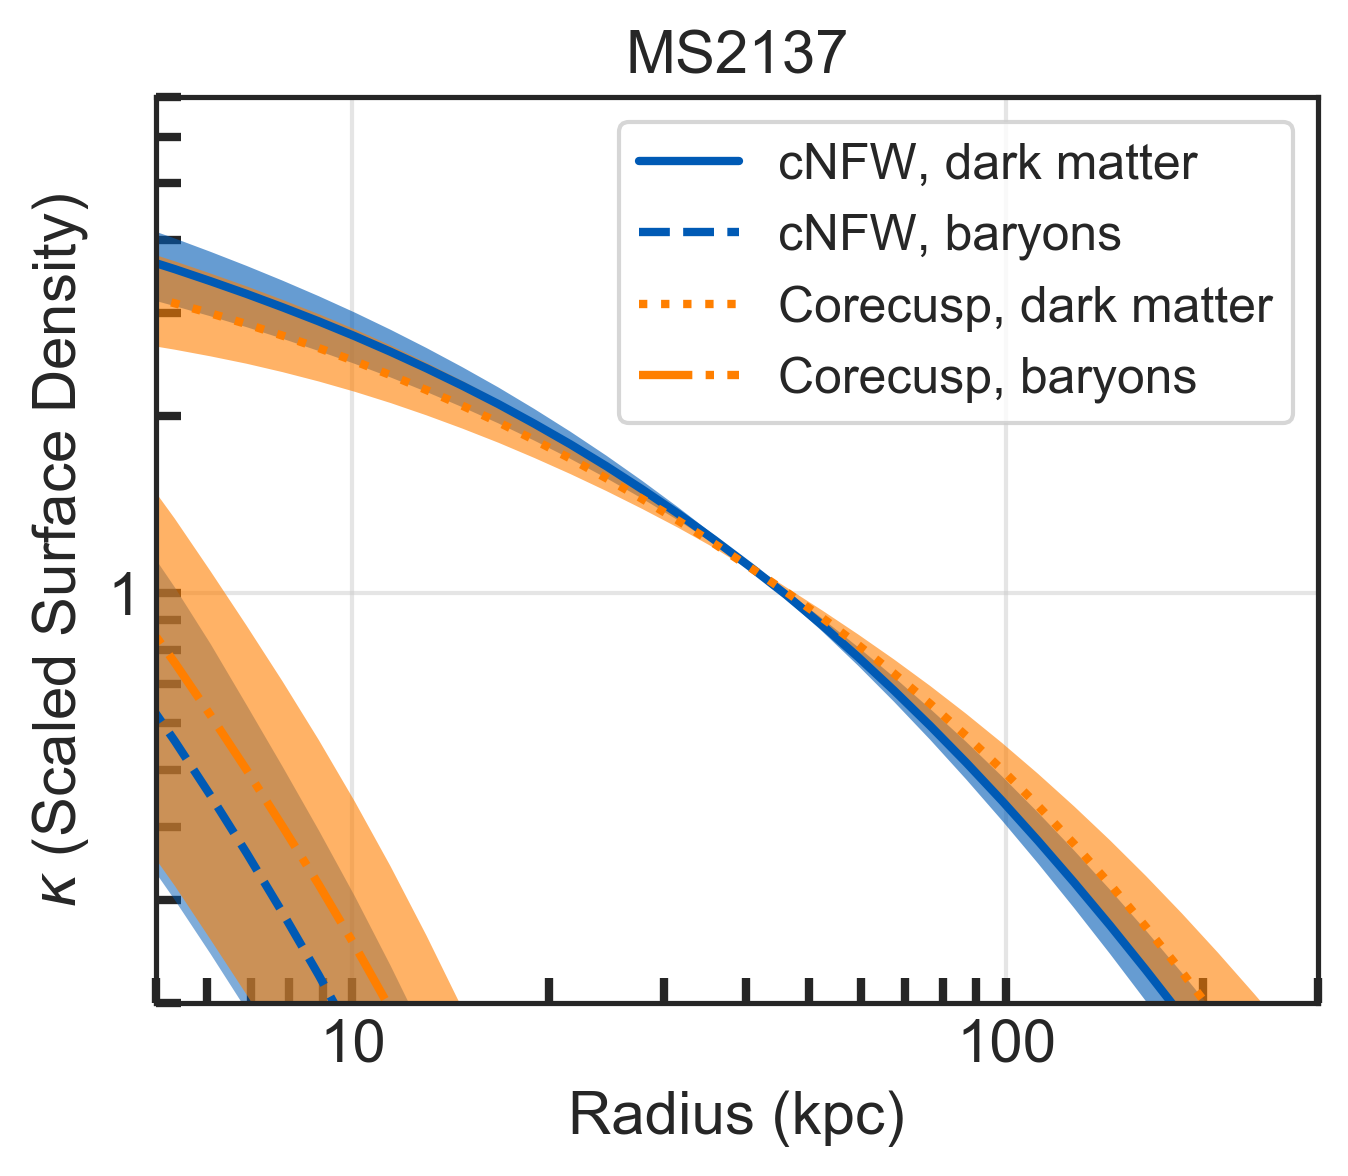

In [5]:
# Plot the kappa profiles all on the same plot.
plt.rcParams["figure.dpi"] = 300
# plt.rcParams["figure.figsize"] = [8.3, 6]
plt.rcParams.update({'legend.fontsize': 'large',
          'figure.figsize': (5, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
          'legend.frameon': True })

plt.style.use('seaborn-ticks')
fig = plt.figure(1)
ax = fig.add_subplot(1, 1, 1)
if enable_left_y_axis:
    ax2 = ax.twinx()
    ax2.set_ylabel( r'Mass Enclosed ($M_{\odot}$)' )
ax.grid(which='major', alpha=0.5)
# ax.axis('equal')
plt.figure(num=1, figsize=(11, 8)) 

styles = ['-', '--',  ':', '-.', ':',  '-.']
# colors = ['#005AB5', '#ff7f00', '#4daf4a', '#005AB5', '#ff7f00', '#4daf4a']
colors = ['#005AB5', '#005AB5', '#ff7f00', '#ff7f00', '#ff7f00']
alphas = [0.6, 0.5, 0.6, 0.6, 0.5, 0.6]
for rad, sm, sp, med, lab, style, leg, color, alpha in zip(rad_list, lower_line, upper_line, median_line,\
        label_list, styles, long_legends, colors, alphas):
    if not 'mass' in lab:
        ax.fill_between(rad, sm, sp, where= sp >= sm, facecolor=color, alpha=alpha,\
                    interpolate=True) 
        ax.loglog(rad, med, label=leg, linewidth=2, linestyle=style, color = color)   
    elif 'mass' in lab:
        ax2.fill_between(rad, sm, sp, where= sp >= sm, facecolor=color, alpha=alpha,\
                    interpolate=True) 
        ax2.loglog(rad, med, label=leg, linewidth=2, linestyle=style, color = color)  
        # To get this added to the ax legend:
        ax.loglog(30, 1, linewidth=2, linestyle=style, color = color, label=leg)
    else:
        pass
        

ax.set_title(title_name)
ax.tick_params(direction='in', length=6, width=2, axis='both', which='both')
ax.set_xlabel( 'Radius (kpc)' )
ax.set_ylabel( r'$\kappa$ (Scaled Surface Density)' )
ax.set_yticks([1])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
# ax.set_title('cNFW Model')
ax.set_autoscaley_on(False)
ax.set_ylim(.2, 7)
ax.set_xlim(5, 300)
ax.legend(frameon=True) # to put it in a specific spot, you can put in, for example: , loc='lower center'
# manually handle ordering of legend
handles, labels = plt.gca().get_legend_handles_labels()
order2 = [0,2,1]
# plt.legend([handles[idx2] for idx2 in order2],[labels[idx2] for idx2 in order2])
# ax.axvspan(7, 28, alpha=0.3, color='red')
# ax.annotate('image locations', xy=(10, .65), xytext=(2.,.65), arrowprops={'arrowstyle': '-'}\
#             , va='center')


plt.show()

In [6]:
sys.exit()

SystemExit: 

/Users/kevin/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [7]:
savename = basepath  + dir_names[0] + '/' + title_name + '.dmbary.kappadistplot.png'
fig.savefig(savename, dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='png',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)

/Users/kevin/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:5: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


In [8]:
# copy to the 'kappa plots' folder
os.system('cp ' + savename + ' "' + basepath + 'kappa plots/"')

0